In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import train_test_split
import os
import sys
import warnings

random_seed = 100

In [3]:
train_df = pd.read_csv(r"D:\Envision Racing\data\train.csv")
test_df = pd.read_csv(r'data\test.csv')
train_weather_df = pd.read_csv(r'data\train_weather.csv')
test_weather_df = pd.read_csv(r'data\test_weather.csv')

In [4]:
train_df.head()

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,...,S1_LARGE,S2_LARGE,S3_LARGE,DRIVER_NAME,PIT_TIME,GROUP,TEAM,POWER,LOCATION,EVENT
0,10,1,1,92,0,NaN,05:43.3,0,35.427,0,...,05:43.3,00:35.4,00:43.3,SB,05:14.7,NaN,JR,NaN,Location 2,Free Practice 2
1,10,1,2,87,2,NaN,25.674,2,33.399,2,...,00:25.7,00:33.4,00:41.9,SB,NaN,NaN,JR,NaN,Location 2,Free Practice 2
2,10,1,3,73,0,B,28.129,0,34.091,0,...,00:28.1,00:34.1,00:57.2,SB,NaN,NaN,JR,NaN,Location 2,Free Practice 2
3,11,1,1,73,0,NaN,01:05.0,0,38.416,0,...,01:05.0,00:38.4,00:56.8,LGRA,00:33.0,NaN,AD,NaN,Location 2,Free Practice 2
4,11,1,2,73,0,NaN,28.013,0,36.743,0,...,00:28.0,00:36.7,00:44.7,LGRA,NaN,NaN,AD,NaN,Location 2,Free Practice 2


In [5]:
test_df.head()

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,...,S1_LARGE,S2_LARGE,S3_LARGE,DRIVER_NAME,PIT_TIME,GROUP,TEAM,POWER,LOCATION,EVENT
0,10,1,1,NaN,0,NaN,01:10.2,0,35.433,0,...,01:10.2,00:35.4,00:30.7,SB,00:47.0,1.0,JR,NaN,Location 7,Qualifying Group 1
1,10,1,2,NaN,0,NaN,27.667,0,33.68,0,...,00:27.7,00:33.7,00:37.8,SB,NaN,1.0,JR,250.0,Location 7,Qualifying Group 1
2,10,1,3,NaN,2,NaN,24.688,2,29.309,2,...,00:24.7,00:29.3,00:27.1,SB,NaN,1.0,JR,250.0,Location 7,Qualifying Group 1
3,13,1,1,NaN,0,NaN,01:09.1,0,35.705,0,...,01:09.1,00:35.7,00:30.5,ACO,00:44.7,1.0,DSo,NaN,Location 7,Qualifying Group 1
4,13,1,2,NaN,0,NaN,28.401,0,33.693,0,...,00:28.4,00:33.7,00:36.0,ACO,NaN,1.0,DSo,250.0,Location 7,Qualifying Group 1


In [6]:
train_df.columns = train_df.columns.str.lstrip() 
train_df.columns = train_df.columns.str.lower()
train_df.columns

Index(['number', 'driver_number', 'lap_number', 'lap_time', 'lap_improvement',
       'crossing_finish_line_in_pit', 's1', 's1_improvement', 's2',
       's2_improvement', 's3', 's3_improvement', 'kph', 'elapsed', 'hour',
       's1_large', 's2_large', 's3_large', 'driver_name', 'pit_time', 'group',
       'team', 'power', 'location', 'event'],
      dtype='object')

In [7]:
test_df.columns = test_df.columns.str.lstrip() 
test_df.columns = test_df.columns.str.lower()
test_df.columns

Index(['number', 'driver_number', 'lap_number', 'lap_time', 'lap_improvement',
       'crossing_finish_line_in_pit', 's1', 's1_improvement', 's2',
       's2_improvement', 's3', 's3_improvement', 'kph', 'elapsed', 'hour',
       's1_large', 's2_large', 's3_large', 'driver_name', 'pit_time', 'group',
       'team', 'power', 'location', 'event'],
      dtype='object')

In [8]:
train_weather_df.LOCATION.unique()

array(['Location 2', 'Location 1', 'Location 3', 'Location 7',
       'Location 5', 'Location 6', 'Location 4'], dtype=object)

In [9]:
test_weather_df.LOCATION.unique()

array(['Location 8'], dtype=object)

In [10]:
train_df.driver_name.unique()

array(['SB', 'LGRA', 'ACO', 'NVR', 'MEV', 'OROWL', 'SBU', 'M¬úNT', 'AS',
       'RR', 'ALOTTE', 'N', 'RFRI', 'EMORT', 'SVANDOO', 'N¬úL', 'S¬ÇM',
       'NN', 'AL', 'PWEHRL', 'JVER', 'J', 'OTUR', 'TB'], dtype=object)

In [11]:
train_df.team.unique() == train_df.driver_name.unique()

<ipython-input-11-017980eac84d>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  train_df.team.unique() == train_df.driver_name.unique()


False

In [12]:
train_df.power.unique()

array([ nan, 235., 250.])

In [13]:
train_df.lap_time.dtype

dtype('int64')

<AxesSubplot:xlabel='lap_time', ylabel='Density'>

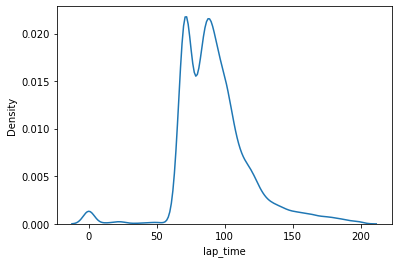

In [14]:
sns.kdeplot(train_df.lap_time)

C:\Users\kurma\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='location', ylabel='count'>

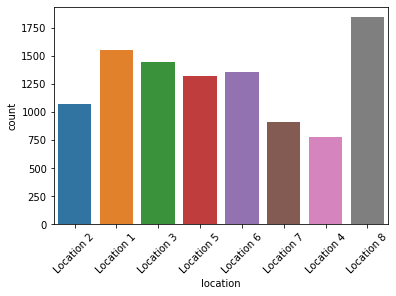

In [15]:
plt.xticks(rotation=45)
sns.countplot(train_df.location)

C:\Users\kurma\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='location', ylabel='count'>

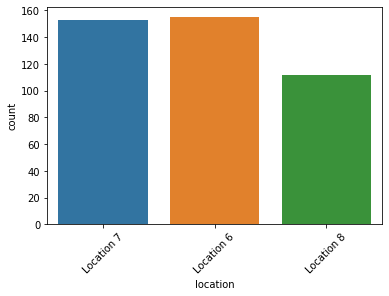

In [16]:
plt.xticks(rotation=45)
sns.countplot(test_df.location)

In [17]:
train_df.s1.dtype

dtype('O')

In [18]:
train_df.head()

,number,driver_number,lap_number,lap_time,lap_improvement,crossing_finish_line_in_pit,s1,s1_improvement,s2,s2_improvement,...,s1_large,s2_large,s3_large,driver_name,pit_time,group,team,power,location,event
0,10,1,1,92,0,NaN,05:43.3,0,35.427,0,...,05:43.3,00:35.4,00:43.3,SB,05:14.7,NaN,JR,NaN,Location 2,Free Practice 2
1,10,1,2,87,2,NaN,25.674,2,33.399,2,...,00:25.7,00:33.4,00:41.9,SB,NaN,NaN,JR,NaN,Location 2,Free Practice 2
2,10,1,3,73,0,B,28.129,0,34.091,0,...,00:28.1,00:34.1,00:57.2,SB,NaN,NaN,JR,NaN,Location 2,Free Practice 2
3,11,1,1,73,0,NaN,01:05.0,0,38.416,0,...,01:05.0,00:38.4,00:56.8,LGRA,00:33.0,NaN,AD,NaN,Location 2,Free Practice 2
4,11,1,2,73,0,NaN,28.013,0,36.743,0,...,00:28.0,00:36.7,00:44.7,LGRA,NaN,NaN,AD,NaN,Location 2,Free Practice 2


<AxesSubplot:xlabel='kph', ylabel='Density'>

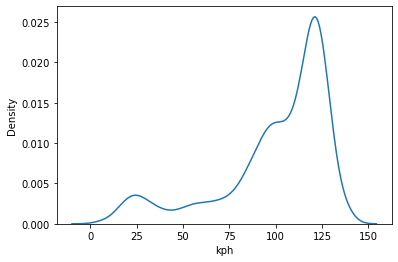

In [19]:
sns.kdeplot(train_df.kph)

In [20]:
train_df.loc[train_df.kph< 10]

,number,driver_number,lap_number,lap_time,lap_improvement,crossing_finish_line_in_pit,s1,s1_improvement,s2,s2_improvement,...,s1_large,s2_large,s3_large,driver_name,pit_time,group,team,power,location,event
2454,29,1,6,72,0,B,24.912,0,28.305,0,...,00:24.9,00:28.3,24:51.2,AS,NaN,NaN,MAHINDRAd,NaN,Location 6,Free Practice 3
2540,4,1,13,69,0,B,24.53,0,28.648,0,...,00:24.5,00:28.6,18:00.5,RFRI,NaN,NaN,EF,NaN,Location 6,Free Practice 3
2577,5,1,10,86,0,B,24.419,0,31.022,0,...,00:24.4,00:31.0,17:10.4,SVANDOO,NaN,NaN,Ml,NaN,Location 6,Free Practice 3
4361,7,1,1,102,0,NaN,22:53.5,0,44.051,0,...,22:53.5,00:44.1,00:30.4,S¬ÇM,22:15.3,NaN,DRAGONo,235.0,Location 4,Free Practice 2
5034,29,1,1,111,0,NaN,25:02.9,0,35.099,0,...,25:02.9,00:35.1,00:28.5,AS,24:36.2,NaN,MAHINDRAd,235.0,Location 5,Free Practice 2
5246,10,1,6,112,0,B,54.593,0,01:06.5,0,...,00:54.6,01:06.5,26:26.2,SB,NaN,NaN,JR,NaN,Location 5,Free Practice 1
5264,11,1,6,90,0,B,28.951,0,35.244,0,...,00:29.0,00:35.2,28:38.1,LGRA,NaN,NaN,AD,NaN,Location 5,Free Practice 1
5285,13,1,8,102,0,NaN,25:18.5,0,39.793,0,...,25:18.5,00:39.8,00:32.2,ACO,25:15.6,NaN,DSo,NaN,Location 5,Free Practice 1
5303,17,1,8,75,0,NaN,25:35.3,0,35.588,0,...,25:35.3,00:35.6,00:34.4,NVR,25:33.8,NaN,ME,NaN,Location 5,Free Practice 1
5320,20,1,6,109,0,B,29.012,0,33.731,0,...,00:29.0,00:33.7,28:41.3,MEV,NaN,NaN,JE,NaN,Location 5,Free Practice 1


In [21]:
# cols = (train_df.columns.str.startswith("s")) or (train_df.columns.str.startswith("lap"))
filter_col = [col for col in train_df if( col.startswith('s') or col.startswith("lap") or col.startswith("pit"))]
lap_df = train_df[filter_col].head(10)
lap_df

,lap_number,lap_time,lap_improvement,s1,s1_improvement,s2,s2_improvement,s3,s3_improvement,s1_large,s2_large,s3_large,pit_time
0,1,92,0,05:43.3,0,35.427,0,43.313,0,05:43.3,00:35.4,00:43.3,05:14.7
1,2,87,2,25.674,2,33.399,2,41.922,2,00:25.7,00:33.4,00:41.9,NaN
2,3,73,0,28.129,0,34.091,0,57.248,0,00:28.1,00:34.1,00:57.2,NaN
3,1,73,0,01:05.0,0,38.416,0,56.833,0,01:05.0,00:38.4,00:56.8,00:33.0
4,2,73,0,28.013,0,36.743,0,44.716,0,00:28.0,00:36.7,00:44.7,NaN
5,3,101,2,25.851,2,33.374,2,42.466,2,00:25.9,00:33.4,00:42.5,NaN
6,4,105,0,27.918,0,34.646,0,48.038,0,00:27.9,00:34.6,00:48.0,NaN
7,1,84,0,46.912,0,42.191,0,49.395,0,00:46.9,00:42.2,00:49.4,00:12.7
8,2,85,0,25.727,0,33.385,0,42.392,0,00:25.7,00:33.4,00:42.4,NaN
9,3,101,0,29.068,0,52.345,0,01:03.7,0,00:29.1,00:52.3,01:03.7,NaN


<AxesSubplot:>

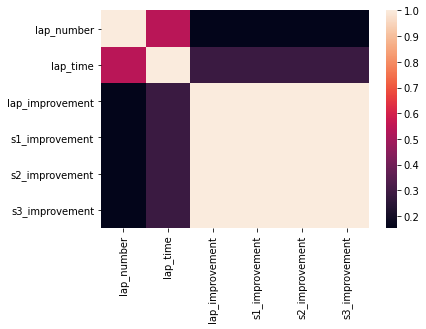

In [22]:
sns.heatmap(lap_df.corr())

In [23]:
# leave weather data for now
# drop columns --> 
# ["driver_number/driver_name",
# "s1_improvement",
# "s2_improvement",
# "s3_improvement",
# "crossing_finish_line_in_pit",
# "pit_time",
# "group",
# "power"]

In [24]:
train_df.dtypes

number                           int64
driver_number                    int64
lap_number                       int64
lap_time                         int64
lap_improvement                  int64
crossing_finish_line_in_pit     object
s1                              object
s1_improvement                   int64
s2                              object
s2_improvement                   int64
s3                              object
s3_improvement                   int64
kph                            float64
elapsed                         object
hour                            object
s1_large                        object
s2_large                        object
s3_large                        object
driver_name                     object
pit_time                        object
group                          float64
team                            object
power                          float64
location                        object
event                           object
dtype: object

In [25]:
train_df.isna().sum()

number                            0
driver_number                     0
lap_number                        0
lap_time                          0
lap_improvement                   0
crossing_finish_line_in_pit    9042
s1                                4
s1_improvement                    0
s2                                8
s2_improvement                    0
s3                               34
s3_improvement                    0
kph                              30
elapsed                           0
hour                              0
s1_large                          4
s2_large                          8
s3_large                         34
driver_name                       0
pit_time                       8378
group                          9768
team                              0
power                          7373
location                          0
event                             0
dtype: int64

In [26]:
train_df[['hour','elapsed',"lap_number","lap_time","driver_name","event"]]
#  elapsed is total time spent by car on race track

,hour,elapsed,lap_number,lap_time,driver_name,event
0,22:02.0,07:02.0,1,92,SB,Free Practice 2
1,23:43.0,08:43.0,2,87,SB,Free Practice 2
2,25:42.5,10:42.5,3,73,SB,Free Practice 2
3,17:40.2,02:40.2,1,73,LGRA,Free Practice 2
4,19:29.7,04:29.7,2,73,LGRA,Free Practice 2
...,...,...,...,...,...,...
10271,23:54.7,23:54.7,17,84,PWEHRL,Free Practice 1
10272,25:11.0,25:11.0,18,70,PWEHRL,Free Practice 1
10273,28:15.1,28:15.1,19,70,PWEHRL,Free Practice 1
10274,29:22.3,29:22.3,20,155,PWEHRL,Free Practice 1


In [27]:
elapsed_num = pd.to_numeric(train_df.elapsed,errors='ignore')
# # elapsed_min = map(int,elapsed_num.str.split(":")[0])
# elapsed_num.str.split(":")

In [28]:
elapsed_num

0        07:02.0
1        08:43.0
2        10:42.5
3        02:40.2
4        04:29.7
          ...   
10271    23:54.7
10272    25:11.0
10273    28:15.1
10274    29:22.3
10275    30:31.5
Name: elapsed, Length: 10276, dtype: object

In [29]:
s1_nan = train_df.s1.isna()
train_df.loc[s1_nan]

,number,driver_number,lap_number,lap_time,lap_improvement,crossing_finish_line_in_pit,s1,s1_improvement,s2,s2_improvement,...,s1_large,s2_large,s3_large,driver_name,pit_time,group,team,power,location,event
5819,28,1,7,89,0,B,NaN,0,NaN,0,...,NaN,NaN,00:32.5,M¬úNT,NaN,NaN,BMWl,NaN,Location 3,Free Practice 2
6051,10,1,9,86,0,NaN,NaN,0,NaN,0,...,NaN,NaN,00:28.1,SB,NaN,NaN,JR,NaN,Location 3,Free Practice 1
8050,13,1,19,73,0,B,NaN,0,NaN,0,...,NaN,NaN,NaN,ACO,NaN,NaN,DSo,NaN,Location 6,Free Practice 1
8141,25,1,19,94,0,B,NaN,0,NaN,0,...,NaN,NaN,NaN,JVER,NaN,NaN,DS¬â,NaN,Location 6,Free Practice 1


In [30]:
s2_nan = train_df.s2.isna()
train_df.loc[s2_nan]

,number,driver_number,lap_number,lap_time,lap_improvement,crossing_finish_line_in_pit,s1,s1_improvement,s2,s2_improvement,...,s1_large,s2_large,s3_large,driver_name,pit_time,group,team,power,location,event
4878,88,1,3,94,0,B,01:12.7,0,NaN,0,...,01:12.7,NaN,NaN,TB,NaN,4.0,NIOO,NaN,Location 4,Qualifying Group 4
5421,33,1,4,94,0,B,29.384,0,NaN,0,...,00:29.4,NaN,NaN,RR,NaN,NaN,AR,NaN,Location 5,Free Practice 1
5819,28,1,7,89,0,B,NaN,0,NaN,0,...,NaN,NaN,00:32.5,M¬úNT,NaN,NaN,BMWl,NaN,Location 3,Free Practice 2
6051,10,1,9,86,0,NaN,NaN,0,NaN,0,...,NaN,NaN,00:28.1,SB,NaN,NaN,JR,NaN,Location 3,Free Practice 1
6053,10,1,11,100,0,NaN,30.702,0,NaN,0,...,00:30.7,NaN,NaN,SB,NaN,NaN,JR,NaN,Location 3,Free Practice 1
6059,10,1,17,105,0,B,31.878,0,NaN,0,...,00:31.9,NaN,NaN,SB,NaN,NaN,JR,NaN,Location 3,Free Practice 1
8050,13,1,19,73,0,B,NaN,0,NaN,0,...,NaN,NaN,NaN,ACO,NaN,NaN,DSo,NaN,Location 6,Free Practice 1
8141,25,1,19,94,0,B,NaN,0,NaN,0,...,NaN,NaN,NaN,JVER,NaN,NaN,DS¬â,NaN,Location 6,Free Practice 1


In [31]:
train_df.loc[s2_nan].index

Int64Index([4878, 5421, 5819, 6051, 6053, 6059, 8050, 8141], dtype='int64')

In [32]:
s3_nan = train_df.s3.isna()
# only_s3_nan = train_df.loc[s3_nan].index not in train_df.loc[s2_nan].index and train_df.loc[s1_nan].index
train_df.loc[s3_nan]

,number,driver_number,lap_number,lap_time,lap_improvement,crossing_finish_line_in_pit,s1,s1_improvement,s2,s2_improvement,...,s1_large,s2_large,s3_large,driver_name,pit_time,group,team,power,location,event
2259,11,1,24,92,0,B,25.107,0,29.162,0,...,00:25.1,00:29.2,NaN,LGRA,NaN,NaN,AD,NaN,Location 6,Free Practice 3
2479,33,1,21,89,0,B,27.314,0,36.01,0,...,00:27.3,00:36.0,NaN,RR,NaN,NaN,AR,NaN,Location 6,Free Practice 3
2567,48,1,23,87,0,B,26.3,0,29.22,0,...,00:26.3,00:29.2,NaN,EMORT,NaN,NaN,ROKo,NaN,Location 6,Free Practice 3
2580,5,1,13,121,0,B,29.51,0,33.994,0,...,00:29.5,00:34.0,NaN,SVANDOO,NaN,NaN,Ml,NaN,Location 6,Free Practice 3
2643,71,1,24,93,0,B,25.733,0,28.979,0,...,00:25.7,00:29.0,NaN,NN,NaN,NaN,ROK,NaN,Location 6,Free Practice 3
4878,88,1,3,94,0,B,01:12.7,0,NaN,0,...,01:12.7,NaN,NaN,TB,NaN,4.0,NIOO,NaN,Location 4,Qualifying Group 4
5421,33,1,4,94,0,B,29.384,0,NaN,0,...,00:29.4,NaN,NaN,RR,NaN,NaN,AR,NaN,Location 5,Free Practice 1
6053,10,1,11,100,0,NaN,30.702,0,NaN,0,...,00:30.7,NaN,NaN,SB,NaN,NaN,JR,NaN,Location 3,Free Practice 1
6059,10,1,17,105,0,B,31.878,0,NaN,0,...,00:31.9,NaN,NaN,SB,NaN,NaN,JR,NaN,Location 3,Free Practice 1
7938,8,1,18,75,0,B,26.006,0,37.655,0,...,00:26.0,00:37.7,NaN,OTUR,NaN,NaN,NIO,NaN,Location 6,Free Practice 2


In [37]:
train_df.columns

Index(['number', 'driver_number', 'lap_number', 'lap_time', 'lap_improvement',
       'crossing_finish_line_in_pit', 's1', 's1_improvement', 's2',
       's2_improvement', 's3', 's3_improvement', 'kph', 'elapsed', 'hour',
       's1_large', 's2_large', 's3_large', 'driver_name', 'pit_time', 'group',
       'team', 'power', 'location', 'event'],
      dtype='object')

In [38]:
train_df.isna().sum()

number                            0
driver_number                     0
lap_number                        0
lap_time                          0
lap_improvement                   0
crossing_finish_line_in_pit    9042
s1                                4
s1_improvement                    0
s2                                8
s2_improvement                    0
s3                               34
s3_improvement                    0
kph                              30
elapsed                           0
hour                              0
s1_large                          4
s2_large                          8
s3_large                         34
driver_name                       0
pit_time                       8378
group                          9768
team                              0
power                          7373
location                          0
event                             0
dtype: int64

In [45]:
# drop unwanted features
def drop_cols(df):
    df.drop(columns = {
        "number",
        "driver_number",
        "s1",
        "s2",
        "s3",
        "crossing_finish_line_in_pit",
        "pit_time",
        "group",
        "team",
        "power",
        "kph"
    },inplace=True)

In [46]:
drop_cols(train_df)
train_df.columns

Index(['lap_number', 'lap_time', 'lap_improvement', 's1_improvement',
       's2_improvement', 's3_improvement', 'elapsed', 'hour', 's1_large',
       's2_large', 's3_large', 'driver_name', 'location', 'event'],
      dtype='object')

In [47]:
train_df.isna().sum()

lap_number          0
lap_time            0
lap_improvement     0
s1_improvement      0
s2_improvement      0
s3_improvement      0
elapsed             0
hour                0
s1_large            4
s2_large            8
s3_large           34
driver_name         0
location            0
event               0
dtype: int64

In [48]:
train_df

,lap_number,lap_time,lap_improvement,s1_improvement,s2_improvement,s3_improvement,elapsed,hour,s1_large,s2_large,s3_large,driver_name,location,event
0,1,92,0,0,0,0,07:02.0,22:02.0,05:43.3,00:35.4,00:43.3,SB,Location 2,Free Practice 2
1,2,87,2,2,2,2,08:43.0,23:43.0,00:25.7,00:33.4,00:41.9,SB,Location 2,Free Practice 2
2,3,73,0,0,0,0,10:42.5,25:42.5,00:28.1,00:34.1,00:57.2,SB,Location 2,Free Practice 2
3,1,73,0,0,0,0,02:40.2,17:40.2,01:05.0,00:38.4,00:56.8,LGRA,Location 2,Free Practice 2
4,2,73,0,0,0,0,04:29.7,19:29.7,00:28.0,00:36.7,00:44.7,LGRA,Location 2,Free Practice 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10271,17,84,0,0,0,0,23:54.7,23:54.7,00:22.9,00:21.2,00:23.7,PWEHRL,Location 8,Free Practice 1
10272,18,70,0,0,0,0,25:11.0,25:11.0,00:23.6,00:22.4,00:30.3,PWEHRL,Location 8,Free Practice 1
10273,19,70,0,0,0,0,28:15.1,28:15.1,02:17.1,00:22.7,00:24.3,PWEHRL,Location 8,Free Practice 1
10274,20,155,2,2,2,2,29:22.3,29:22.3,00:22.5,00:21.1,00:23.5,PWEHRL,Location 8,Free Practice 1


In [51]:
# convert hour feature to seconds
def convert_time_to_seconds(x):
    if type(x) is (int or float):
        return x
    if type(x) is str:
        min = x.split(":")[0]
        sec = x.split(":")[1]
        sec = float(sec)
        min = float(min)
        sec = sec//60
        return min + sec

In [52]:
cols_with_time = ['elapsed','hour','s3_large','s1_large','s2_large']
train_df[cols_with_time] = train_df[cols_with_time].applymap(convert_time_to_seconds)

In [56]:
100/60

1.6666666666666667

In [53]:
train_df

,lap_number,lap_time,lap_improvement,s1_improvement,s2_improvement,s3_improvement,elapsed,hour,s1_large,s2_large,s3_large,driver_name,location,event
0,1,92,0,0,0,0,7.033333,22.033333,5.721667,0.590000,0.721667,SB,Location 2,Free Practice 2
1,2,87,2,2,2,2,8.716667,23.716667,0.428333,0.556667,0.698333,SB,Location 2,Free Practice 2
2,3,73,0,0,0,0,10.708333,25.708333,0.468333,0.568333,0.953333,SB,Location 2,Free Practice 2
3,1,73,0,0,0,0,2.670000,17.670000,1.083333,0.640000,0.946667,LGRA,Location 2,Free Practice 2
4,2,73,0,0,0,0,4.495000,19.495000,0.466667,0.611667,0.745000,LGRA,Location 2,Free Practice 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10271,17,84,0,0,0,0,23.911667,23.911667,0.381667,0.353333,0.395000,PWEHRL,Location 8,Free Practice 1
10272,18,70,0,0,0,0,25.183333,25.183333,0.393333,0.373333,0.505000,PWEHRL,Location 8,Free Practice 1
10273,19,70,0,0,0,0,28.251667,28.251667,2.285000,0.378333,0.405000,PWEHRL,Location 8,Free Practice 1
10274,20,155,2,2,2,2,29.371667,29.371667,0.375000,0.351667,0.391667,PWEHRL,Location 8,Free Practice 1


## drop unwanted features

In [33]:
def drop_cols(df):
    df.drop(columns = {
        "number",
        "driver_number",
        "lap_improvement",
        "s1",
        "s2",
        "s3",
        "s1_improvement",
        "s2_improvement",
        "s3_improvement",
        "crossing_finish_line_in_pit",
        "pit_time",
        "group",
        "team",
        "power",
        "kph",
        "hour",
        "elapsed"
    },inplace=True)
    display(df.head())
#  convert object type to time/numeric
#  drop nan rows in s3

In [34]:
train_df[[col for col in train_df if col != "lap_time"]]

,number,driver_number,lap_number,lap_improvement,crossing_finish_line_in_pit,s1,s1_improvement,s2,s2_improvement,s3,...,s1_large,s2_large,s3_large,driver_name,pit_time,group,team,power,location,event
0,10,1,1,0,NaN,05:43.3,0,35.427,0,43.313,...,05:43.3,00:35.4,00:43.3,SB,05:14.7,NaN,JR,NaN,Location 2,Free Practice 2
1,10,1,2,2,NaN,25.674,2,33.399,2,41.922,...,00:25.7,00:33.4,00:41.9,SB,NaN,NaN,JR,NaN,Location 2,Free Practice 2
2,10,1,3,0,B,28.129,0,34.091,0,57.248,...,00:28.1,00:34.1,00:57.2,SB,NaN,NaN,JR,NaN,Location 2,Free Practice 2
3,11,1,1,0,NaN,01:05.0,0,38.416,0,56.833,...,01:05.0,00:38.4,00:56.8,LGRA,00:33.0,NaN,AD,NaN,Location 2,Free Practice 2
4,11,1,2,0,NaN,28.013,0,36.743,0,44.716,...,00:28.0,00:36.7,00:44.7,LGRA,NaN,NaN,AD,NaN,Location 2,Free Practice 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10271,99,1,17,0,NaN,22.936,0,21.231,0,23.701,...,00:22.9,00:21.2,00:23.7,PWEHRL,NaN,NaN,TAG,250.0,Location 8,Free Practice 1
10272,99,1,18,0,B,23.61,0,22.432,0,30.281,...,00:23.6,00:22.4,00:30.3,PWEHRL,NaN,NaN,TAG,235.0,Location 8,Free Practice 1
10273,99,1,19,0,NaN,02:17.1,0,22.681,0,24.308,...,02:17.1,00:22.7,00:24.3,PWEHRL,01:59.9,NaN,TAG,250.0,Location 8,Free Practice 1
10274,99,1,20,2,NaN,22.539,2,21.057,2,23.548,...,00:22.5,00:21.1,00:23.5,PWEHRL,NaN,NaN,TAG,250.0,Location 8,Free Practice 1


In [35]:
train_df.driver_name.nunique()

24

In [35]:
drop_cols(train_df)

,lap_number,lap_time,s1_large,s2_large,s3_large,driver_name,location,event
0,1,92,05:43.3,00:35.4,00:43.3,SB,Location 2,Free Practice 2
1,2,87,00:25.7,00:33.4,00:41.9,SB,Location 2,Free Practice 2
2,3,73,00:28.1,00:34.1,00:57.2,SB,Location 2,Free Practice 2
3,1,73,01:05.0,00:38.4,00:56.8,LGRA,Location 2,Free Practice 2
4,2,73,00:28.0,00:36.7,00:44.7,LGRA,Location 2,Free Practice 2


In [36]:
X_train,X_val,Y_train,Y_val = train_test_split(train_df[[col for col in train_df if col != "lap_time"]]
,train_df.lap_time,test_size=0.05,random_state=random_seed,stratify=train_df.location)

In [37]:
X_train.shape,X_val.shape,Y_train.shape,Y_val.shape

((9762, 7), (514, 7), (9762,), (514,))

C:\Users\kurma\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='location', ylabel='count'>

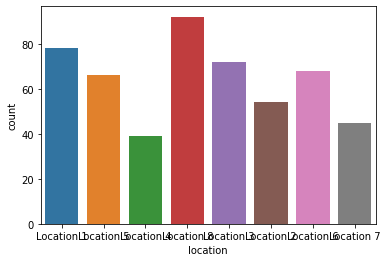

In [38]:
sns.countplot(X_val.location)

C:\Users\kurma\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='location', ylabel='count'>

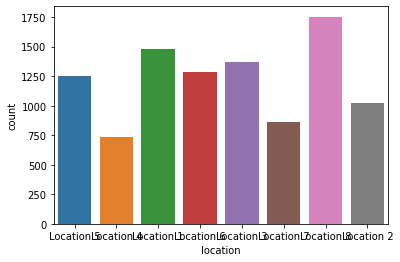

In [39]:
sns.countplot(X_train.location)

In [40]:
X_train.head()

,lap_number,s1_large,s2_large,s3_large,driver_name,location,event
5486,3,00:53.4,00:38.6,01:39.6,EMORT,Location 5,Free Practice 1
4696,10,00:29.7,00:47.6,00:31.7,RFRI,Location 4,Free Practice 1
7268,6,00:24.2,00:20.1,00:44.0,N,Location 1,Free Practice 1
4451,7,00:34.7,00:50.1,00:44.4,SB,Location 4,Free Practice 1
1970,16,00:35.0,00:38.2,00:37.2,N,Location 5,Free Practice 3


In [41]:
cat = X_train.select_dtypes(include=['object']).columns
cat

Index(['s1_large', 's2_large', 's3_large', 'driver_name', 'location', 'event'], dtype='object')

In [42]:
train_df.dropna(subset=['s1_large'],axis=0,inplace=True)

In [170]:
train_df.s1_large.isna().sum()

4

In [45]:
train_df.shape

(10272, 8)

In [46]:
def convert_time_to_seconds(x):
    if x == "nan":
        return 0
    # print(x)
    # print(type(x))
    min = (x.split(":")[0])
    sec = (x.split(":")[1])
    sec = float(sec)
    min = float(min)
    # min,sec = map(float,x.split(":"))
    sec = sec/60
    return min + sec

In [48]:
train_df.s1_large.apply(convert_time_to_seconds)

0        5.721667
1        0.428333
2        0.468333
3        1.083333
4        0.466667
           ...   
10271    0.381667
10272    0.393333
10273    2.285000
10274    0.375000
10275    0.386667
Name: s1_large, Length: 10272, dtype: float64

In [118]:
train_df.s1_large

113    02:50.0
Name: s1_large, dtype: object

In [51]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(X_train.location.values.reshape(-1,1))

OneHotEncoder(sparse=False)

In [52]:
ohe.transform(X_train.location.values.reshape(-1,1))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [57]:
ohe.transform(test_df.location.values.reshape(-1,1))

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [53]:
pd.get_dummies(X_train.location)

,Location 1,Location 2,Location 3,Location 4,Location 5,Location 6,Location 7,Location 8
5486,0,0,0,0,1,0,0,0
4696,0,0,0,1,0,0,0,0
7268,1,0,0,0,0,0,0,0
4451,0,0,0,1,0,0,0,0
1970,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
8246,0,0,0,0,0,1,0,0
162,0,1,0,0,0,0,0,0
5971,0,0,1,0,0,0,0,0
9553,0,0,0,0,0,0,0,1


In [55]:
pd.get_dummies(test_df.location)

,Location 6,Location 7,Location 8
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
415,0,0,1
416,0,0,1
417,0,0,1
418,0,0,1


In [ ]:
pd.to_datetime(train_df.s1,errors='ignore')

0        05:43.3
1         25.674
2         28.129
3        01:05.0
4         28.013
          ...   
10271     22.936
10272      23.61
10273    02:17.1
10274     22.539
10275     23.193
Name: s1, Length: 10276, dtype: object

In [ ]:
train_df.

0        05:43.3
1         25.674
2         28.129
3        01:05.0
4         28.013
          ...   
10271     22.936
10272      23.61
10273    02:17.1
10274     22.539
10275     23.193
Name: s1, Length: 10276, dtype: object

In [58]:
train_df.isna().sum()

lap_number      0
lap_time        0
s1_large        0
s2_large        4
s3_large       32
driver_name     0
location        0
event           0
dtype: int64

In [60]:
len(X_train.columns)

7

In [64]:
train_df["s3_large"] = train_df["s3_large"]

In [65]:
def mod_names(df):
    df.columns = df.columns.str.lstrip() 
    df.columns = df.columns.str.lower()

In [66]:
mod_names(train_df)

In [67]:
train_df.columns

Index(['lap_number', 'lap_time', 's1_large', 's2_large', 's3_large',
       'driver_name', 'location', 'event'],
      dtype='object')

In [68]:
test_df = pd.read_csv(r'data\test.csv')

In [69]:
test_df.columns

Index(['NUMBER', ' DRIVER_NUMBER', ' LAP_NUMBER', 'LAP_TIME',
       ' LAP_IMPROVEMENT', ' CROSSING_FINISH_LINE_IN_PIT', ' S1',
       ' S1_IMPROVEMENT', ' S2', ' S2_IMPROVEMENT', ' S3', ' S3_IMPROVEMENT',
       ' KPH', ' ELAPSED', ' HOUR', 'S1_LARGE', 'S2_LARGE', 'S3_LARGE',
       'DRIVER_NAME', 'PIT_TIME', 'GROUP', 'TEAM', 'POWER', 'LOCATION',
       'EVENT'],
      dtype='object')

In [70]:
test_df

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,...,S1_LARGE,S2_LARGE,S3_LARGE,DRIVER_NAME,PIT_TIME,GROUP,TEAM,POWER,LOCATION,EVENT
0,10,1,1,NaN,0,NaN,01:10.2,0,35.433,0,...,01:10.2,00:35.4,00:30.7,SB,00:47.0,1.0,JR,NaN,Location 7,Qualifying Group 1
1,10,1,2,NaN,0,NaN,27.667,0,33.68,0,...,00:27.7,00:33.7,00:37.8,SB,NaN,1.0,JR,250.0,Location 7,Qualifying Group 1
2,10,1,3,NaN,2,NaN,24.688,2,29.309,2,...,00:24.7,00:29.3,00:27.1,SB,NaN,1.0,JR,250.0,Location 7,Qualifying Group 1
3,13,1,1,NaN,0,NaN,01:09.1,0,35.705,0,...,01:09.1,00:35.7,00:30.5,ACO,00:44.7,1.0,DSo,NaN,Location 7,Qualifying Group 1
4,13,1,2,NaN,0,NaN,28.401,0,33.693,0,...,00:28.4,00:33.7,00:36.0,ACO,NaN,1.0,DSo,250.0,Location 7,Qualifying Group 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,36,1,2,NaN,2,NaN,22.648,2,21.002,2,...,00:22.6,00:21.0,00:23.4,ALOTTE,NaN,3.0,TAG,250.0,Location 8,Qualifying Group 3
416,5,1,1,NaN,0,NaN,02:51.2,0,26.054,0,...,02:51.2,00:26.1,00:25.7,SVANDOO,02:30.4,3.0,Ml,250.0,Location 8,Qualifying Group 3
417,5,1,2,NaN,4,NaN,22.401,2,20.984,2,...,00:22.4,00:21.0,00:23.3,SVANDOO,NaN,3.0,Ml,250.0,Location 8,Qualifying Group 3
418,99,1,1,NaN,0,NaN,02:42.8,0,22.288,0,...,02:42.8,00:22.3,00:27.7,PWEHRL,02:25.1,3.0,TAG,250.0,Location 8,Qualifying Group 3


In [73]:
test_df.loc[test_df['S3_LARGE'].isna()]

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,...,S1_LARGE,S2_LARGE,S3_LARGE,DRIVER_NAME,PIT_TIME,GROUP,TEAM,POWER,LOCATION,EVENT
80,25,1,3,NaN,0,B,01:12.1,0,30.11,2,...,01:12.1,00:30.1,NaN,JVER,NaN,1.0,DS¬â,NaN,Location 6,Qualifying Group 1
144,99,1,4,NaN,0,B,27.293,0,33.044,0,...,00:27.3,00:33.0,NaN,PWEHRL,NaN,3.0,TAG,NaN,Location 6,Qualifying Group 3


In [75]:
train_df.loc[train_df['s3_large'].isna()]

,lap_number,lap_time,s1_large,s2_large,s3_large,driver_name,location,event
2259,24,92,00:25.1,00:29.2,NaN,LGRA,Location 6,Free Practice 3
2479,21,89,00:27.3,00:36.0,NaN,RR,Location 6,Free Practice 3
2567,23,87,00:26.3,00:29.2,NaN,EMORT,Location 6,Free Practice 3
2580,13,121,00:29.5,00:34.0,NaN,SVANDOO,Location 6,Free Practice 3
2643,24,93,00:25.7,00:29.0,NaN,NN,Location 6,Free Practice 3
4878,3,94,01:12.7,NaN,NaN,TB,Location 4,Qualifying Group 4
5421,4,94,00:29.4,NaN,NaN,RR,Location 5,Free Practice 1
6053,11,100,00:30.7,NaN,NaN,SB,Location 3,Free Practice 1
6059,17,105,00:31.9,NaN,NaN,SB,Location 3,Free Practice 1
7938,18,75,00:26.0,00:37.7,NaN,OTUR,Location 6,Free Practice 2
